In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.compat.v1.set_random_seed(4)
tf.keras.layers.BatchNormalization()
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
data=pd.read_csv('data2.csv')
data


,Heat Flux,Concentration,Reynolds Number,Nusselt Number
0,6.25,0.05,7889.79,63.21
1,6.25,0.05,11834.68,102.32
2,6.25,0.05,15779.58,135.37
3,6.25,0.05,19724.47,172.82
4,6.25,0.05,23669.37,217.39
...,...,...,...,...
115,143.23,0.20,7889.79,87.47
116,143.23,0.20,11834.68,152.50
117,143.23,0.20,15779.58,302.13
118,143.23,0.20,19724.47,355.50


In [ ]:
data.columns


Index(['Heat Flux', 'Concentration', 'Reynolds Number', 'Nusselt Number'], dtype='object')

In [ ]:
data.value_counts()

Heat Flux  Concentration  Reynolds Number  Nusselt Number
6.25       0.05           7889.79          63.21             1
                          11834.68         102.32            1
130.21     0.10           19724.47         312.00            1
                          15779.58         270.34            1
                          11834.68         143.58            1
                                                            ..
26.04      0.20           7889.79          71.71             1
           0.15           23669.37         273.64            1
                          19724.47         207.63            1
                          15779.58         150.45            1
143.23     0.20           23669.37         498.27            1
Length: 120, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
data.describe()

,Heat Flux,Concentration,Reynolds Number,Nusselt Number
count,120.000000,120.000000,120.000000,120.000000
mean,75.695000,0.125000,15779.578000,198.138667
std,51.184756,0.056136,5602.315829,106.878304
min,6.250000,0.050000,7889.790000,63.210000
25%,26.040000,0.087500,11834.680000,112.040000
50%,74.220000,0.125000,15779.580000,180.150000
75%,130.210000,0.162500,19724.470000,273.682500
max,143.230000,0.200000,23669.370000,498.270000


In [ ]:
data.corr()

,Heat Flux,Concentration,Reynolds Number,Nusselt Number
Heat Flux,1.000000e+00,5.714696e-17,-3.548038e-16,0.412018
Concentration,5.714696e-17,1.000000e+00,-3.645312e-17,0.070994
Reynolds Number,-3.548038e-16,-3.645312e-17,1.000000e+00,0.849909
Nusselt Number,4.120179e-01,7.099409e-02,8.499092e-01,1.000000


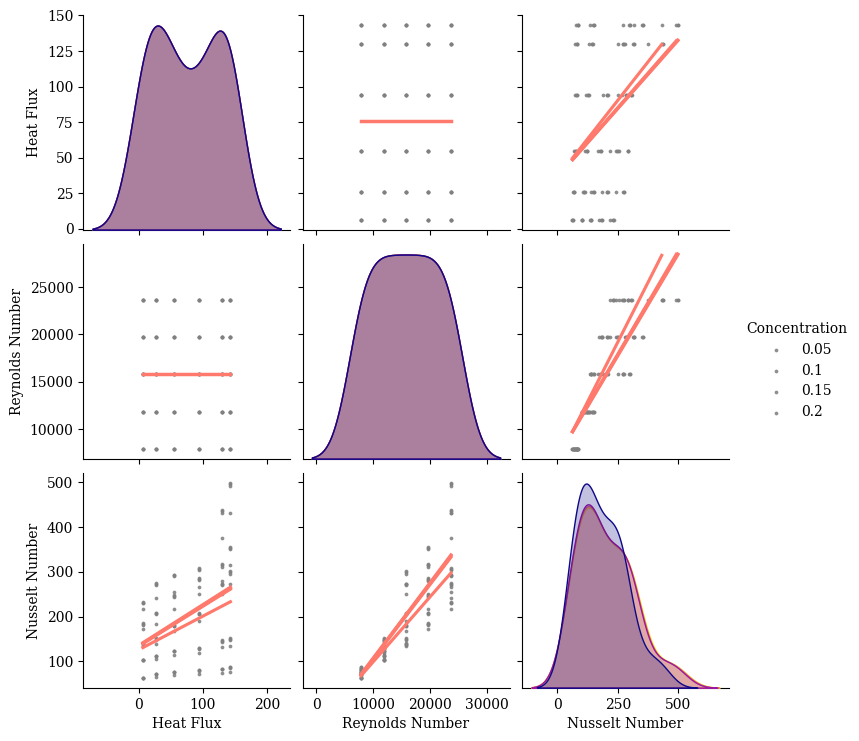

In [ ]:
sns.pairplot(data,hue='Concentration', palette='plasma' ,kind='reg',
             plot_kws={'ci':None, 'color': 'xkcd:salmon',
                       'scatter_kws': {'color': 'gray', 's': 3}
                      }) 
plt.show() 

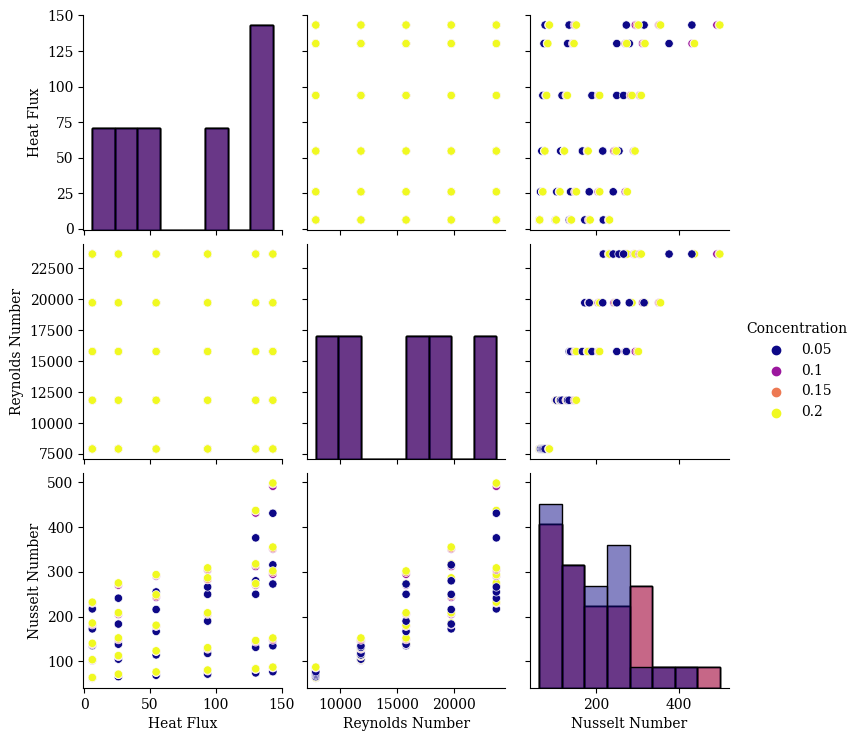

In [ ]:
sns.pairplot(data,diag_kind="hist",hue='Concentration',  palette='plasma')
plt.savefig('pairplotAl2O3.tiff', dpi=400)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

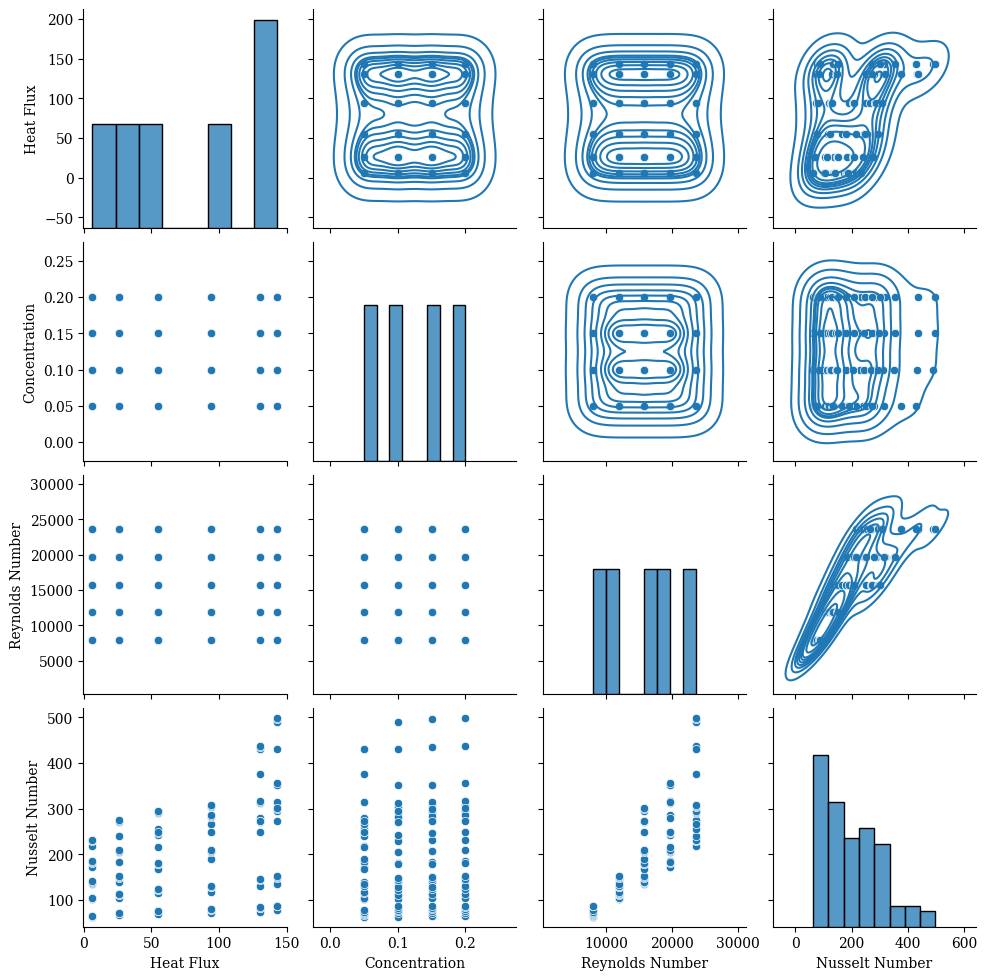

In [ ]:
g = sns.pairplot(data,palette='plasma',)
g.map_upper(sns.kdeplot);
plt.savefig('Al2O3.tiff', dpi=400)

The code sns.pairplot(data) is using the pairplot function from the Seaborn data visualization library to create a grid of scatter plots for each combination of features in the data dataset.

The pairplot function takes in a dataset as an argument, and automatically creates a scatter plot for each combination of numerical features in the dataset. It also adds a histogram of each feature along the diagonal of the grid.
the hue parameter is set to 'Concentration', which indicates that the plot should display the data points colored by the 'Concentration' variable.

The hue parameter is an optional parameter that allows you to specify a categorical variable in the dataset, which will be used to color the data points in the scatter plot. In this case, the 'Concentration' variable is being used to group the data points by their concentration level, and each group is being plotted in a different color.

By coloring the data points based on the 'Concentration' variable, it becomes easier to identify any patterns or trends that may be present in the data based on the different levels of concentration. This can be useful for understanding the relationship between different variables in the dataset.

After the pairplot is created, the plt.show() function is called to display the plot. This is a command from the Matplotlib library, which is used by Seaborn to create the actual visualizations. plt.show() opens an interactive window that displays the plot so that it can be viewed or saved.

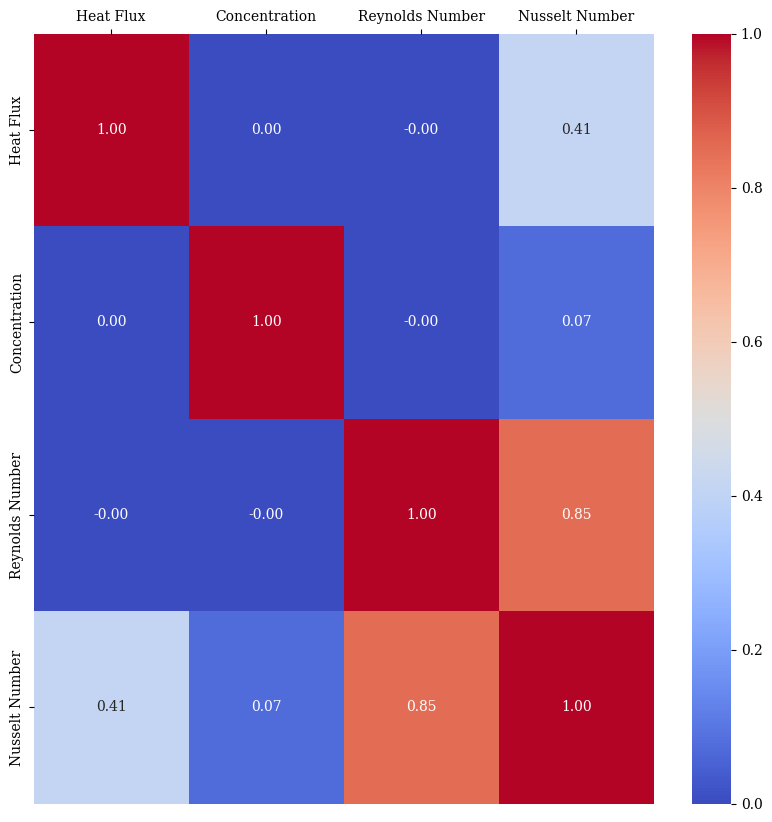

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax=sns.heatmap(data.corr(),cmap='coolwarm', annot=True,fmt=".2f")
ax.xaxis.tick_top()
plt.savefig('heatmapAl2O3.tiff', dpi=400)
plt.show()

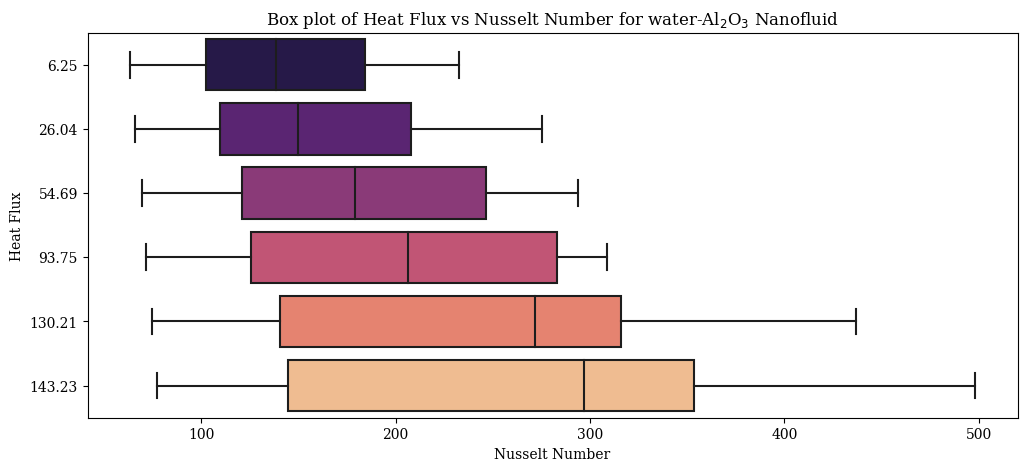

In [ ]:
import matplotlib.pyplot as pl
pl.figure(figsize=(12,5))
pl.title("Box plot of Heat Flux vs Nusselt Number for water-Al$_2$O$_3$ Nanofluid")
sns.boxplot(y='Heat Flux', x='Nusselt Number',data = data, orient="h", palette = 'magma')
plt.savefig('boxqnuAl2O3.tiff', dpi=400)

<Axes: title={'center': 'Box plot for Concentration vs Nusselt Number for water -Al$_2$O$_3$ Nanofluid'}, xlabel='Nusselt Number', ylabel='Concentration'>

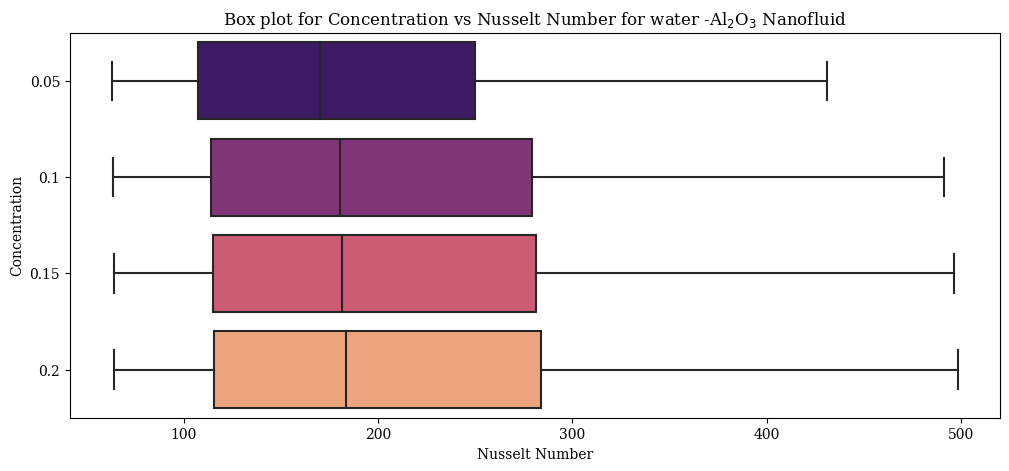

In [ ]:
import matplotlib.pyplot as pl
pl.figure(figsize=(12,5))
pl.title("Box plot for Concentration vs Nusselt Number for water -Al$_2$O$_3$ Nanofluid")
sns.boxplot(y='Concentration', x='Nusselt Number',data = data, orient="h", palette = 'magma')

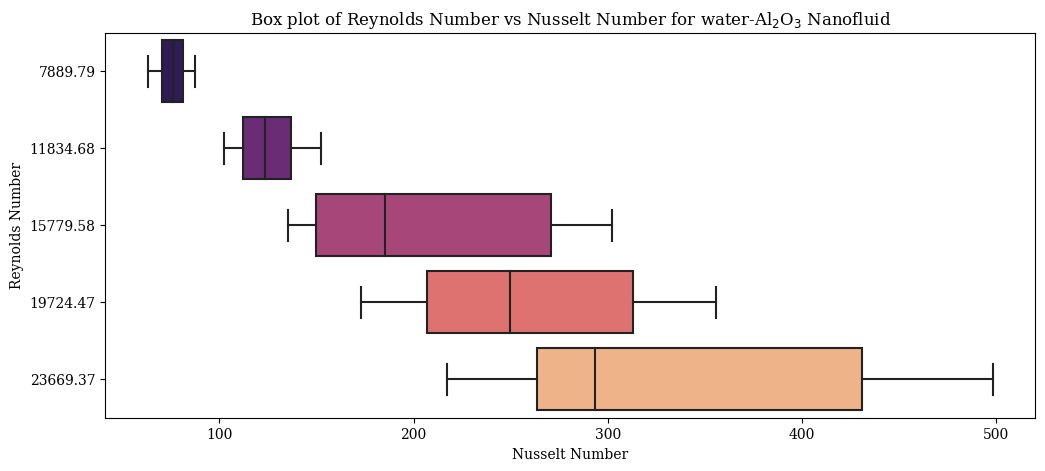

In [ ]:
import matplotlib.pyplot as pl
pl.figure(figsize=(12,5))
pl.title("Box plot of Reynolds Number vs Nusselt Number for water-Al$_2$O$_3$ Nanofluid")
sns.boxplot(y='Reynolds Number', x='Nusselt Number',data = data, orient="h", palette = 'magma')
pl.savefig('boxrenuAl2O3.tiff', dpi=400)

A boxplot is a statistical chart used to display the distribution of a set of continuous data. It provides a graphical representation of the five-number summary of the data, including the minimum value, first quartile (Q1), median (Q2), third quartile (Q3), and maximum value.

The box in the middle of the plot represents the interquartile range (IQR), which is the difference between the first and third quartiles (Q3-Q1). The whiskers extending from the box represent the range of the data within 1.5 times the IQR from the box. Any data points beyond the whiskers are considered outliers and are plotted as individual points.

A typical boxplot consists of a horizontal line inside a rectangular box, with the ends of the line indicating the minimum and maximum values of the data. The box itself represents the IQR, with a vertical line inside indicating the median value. The whiskers extend from the box to indicate the range of the data.

Boxplots are useful for identifying outliers, showing the spread and skewness of the data, and comparing distributions of different groups or variables. They can be created using various software packages such as Python's Matplotlib or Seaborn libraries, R's ggplot2, and Excel.

<ipython-input-17-872d02bfaf42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Nusselt Number"], color = 'm')


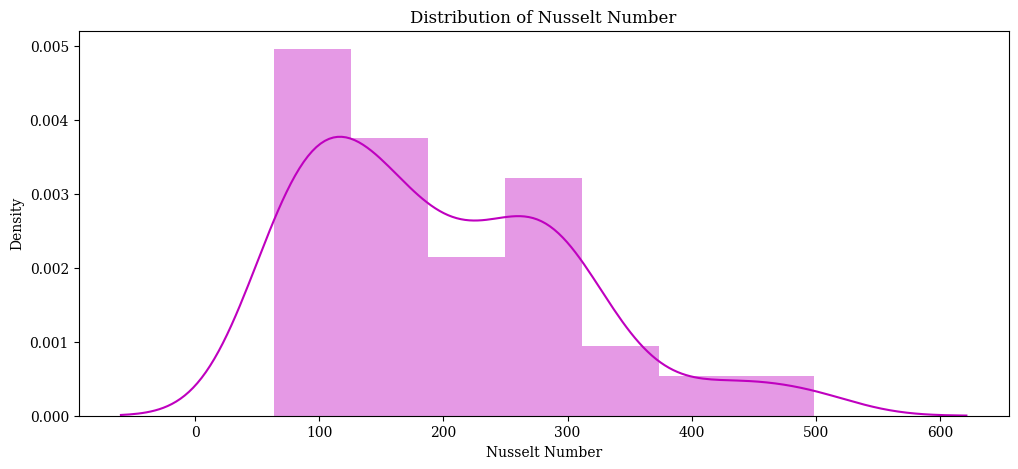

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Nusselt Number")
ax = sns.distplot(data["Nusselt Number"], color = 'm')

<ipython-input-18-f22f20c25ce2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Heat Flux"], color = 'm')


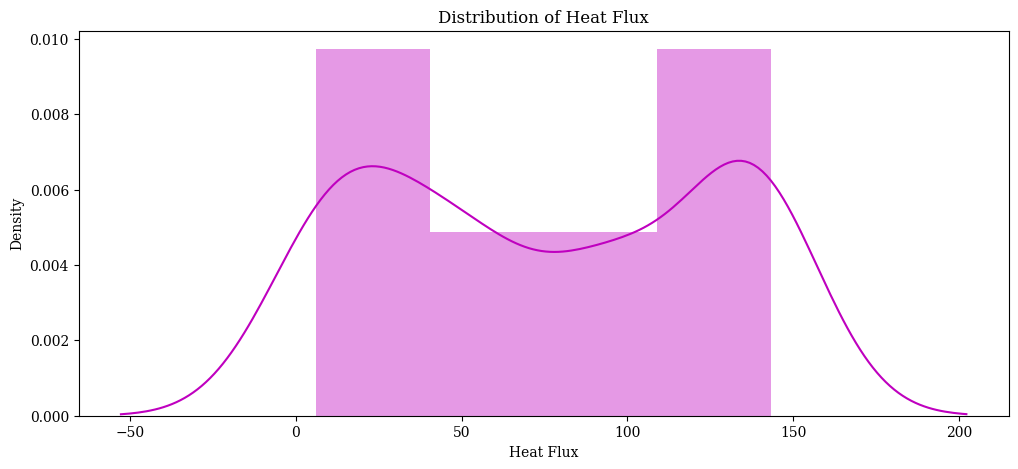

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Heat Flux")
ax = sns.distplot(data["Heat Flux"], color = 'm')

<ipython-input-19-2b94cda4ba02>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Concentration"], color = 'm')


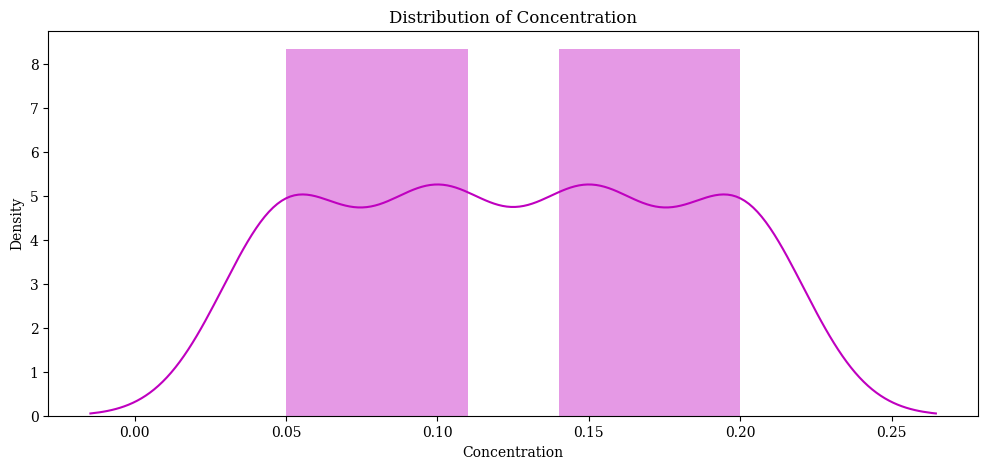

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Concentration")
ax = sns.distplot(data["Concentration"], color = 'm')

<ipython-input-20-c11c2a778b1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Reynolds Number"], color = 'm')


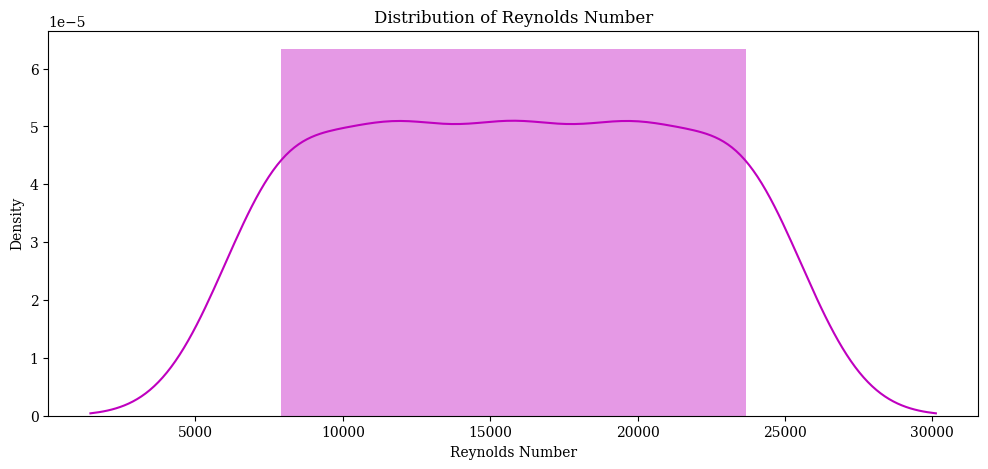

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Reynolds Number")
ax = sns.distplot(data["Reynolds Number"], color = 'm')

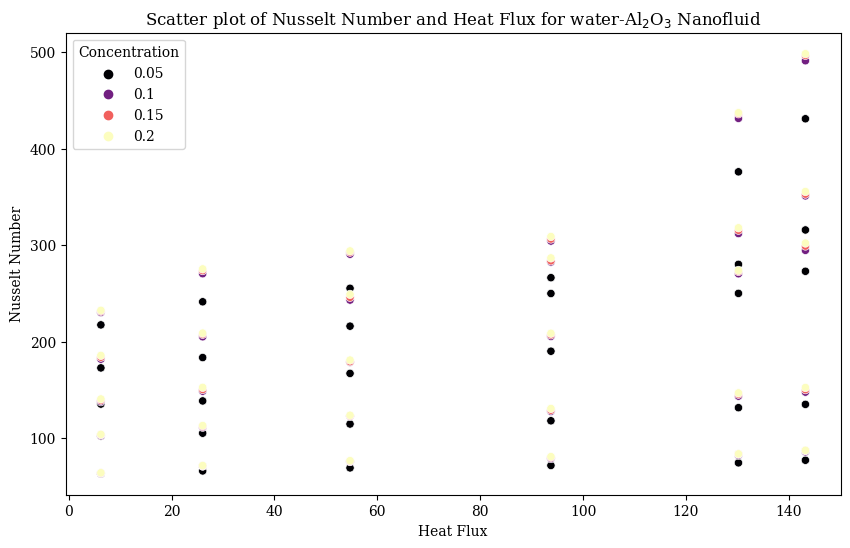

In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(y='Nusselt Number', x='Heat Flux',data=data,palette='magma',hue='Concentration')
ax.set_title('Scatter plot of Nusselt Number and Heat Flux for water-Al$_2$O$_3$ Nanofluid')
plt.savefig('scatternuqAl2O3.tiff', dpi=400)


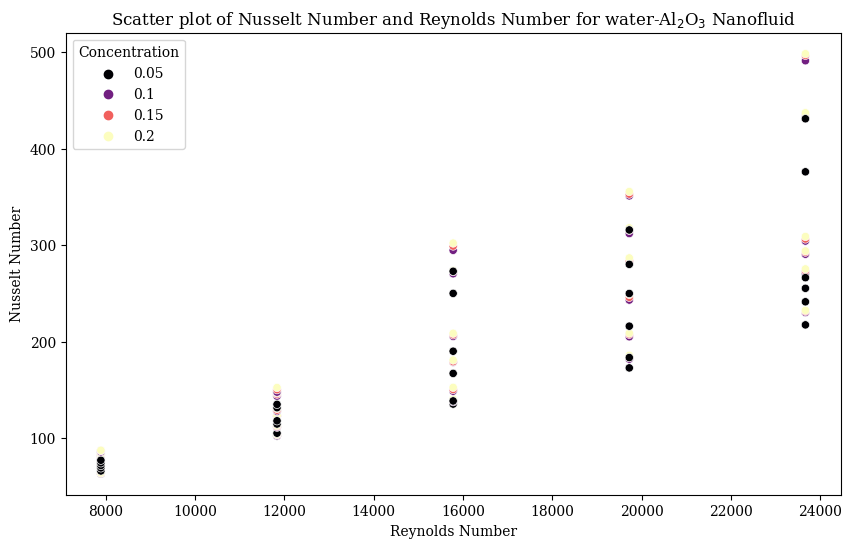

In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(y='Nusselt Number', x='Reynolds Number',data=data,palette='magma',hue='Concentration')
ax.set_title('Scatter plot of Nusselt Number and Reynolds Number for water-Al$_2$O$_3$ Nanofluid')
plt.savefig('scatternureAl2O3.tiff', dpi=400)

In [ ]:
X = data.drop(columns=['Nusselt Number'])
y = data['Nusselt Number'].values


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
data.head()

,Heat Flux,Concentration,Reynolds Number,Nusselt Number
0,6.25,0.05,7889.79,63.21
1,6.25,0.05,11834.68,102.32
2,6.25,0.05,15779.58,135.37
3,6.25,0.05,19724.47,172.82
4,6.25,0.05,23669.37,217.39


In [ ]:
import seaborn as sns
sns.__version__

'0.12.2'

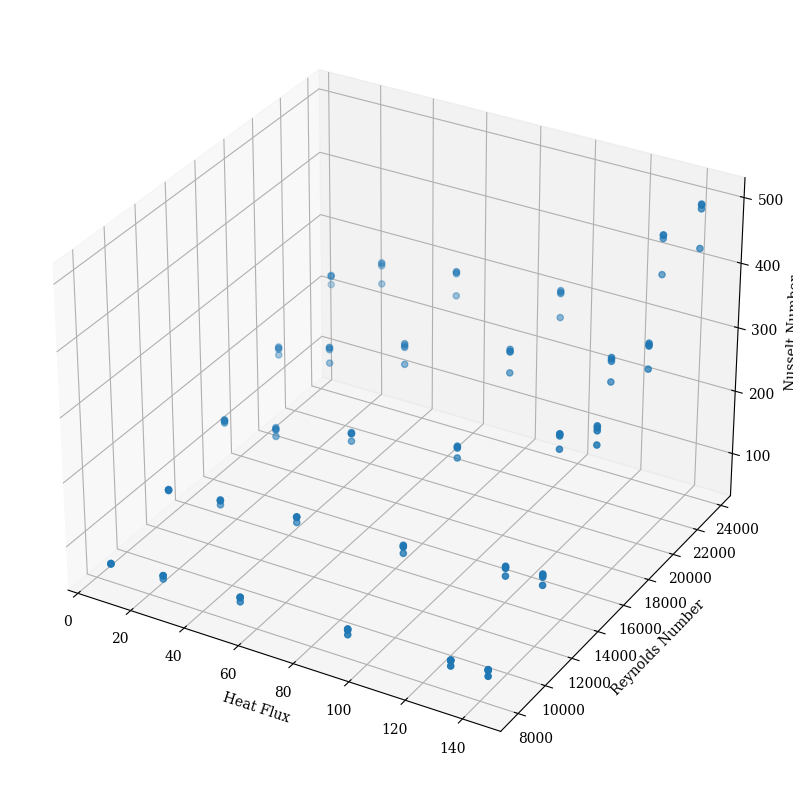

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax4 = fig.add_subplot(1,1,1, projection='3d')
ax4.set_xlabel("Heat Flux")
ax4.set_ylabel("Reynolds Number")
ax4.set_zlabel("Nusselt Number")
ax4.scatter3D(data['Heat Flux'],data['Reynolds Number'],data['Nusselt Number'])
plt.show()


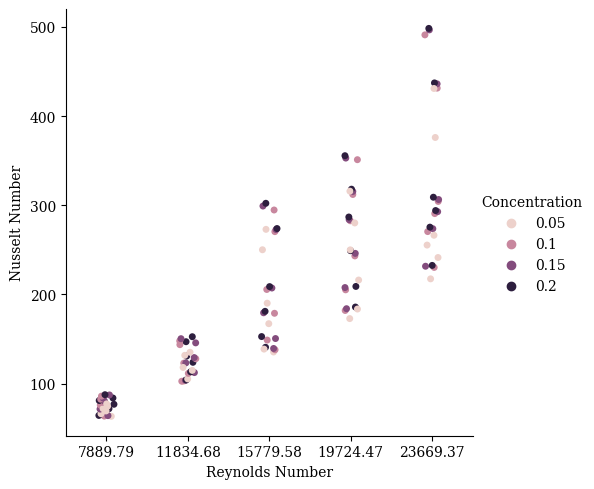

In [ ]:
sns.catplot(data=data, x="Reynolds Number", y="Nusselt Number", hue="Concentration")
plt.savefig('catrenuAl2O3.tiff', dpi=400)

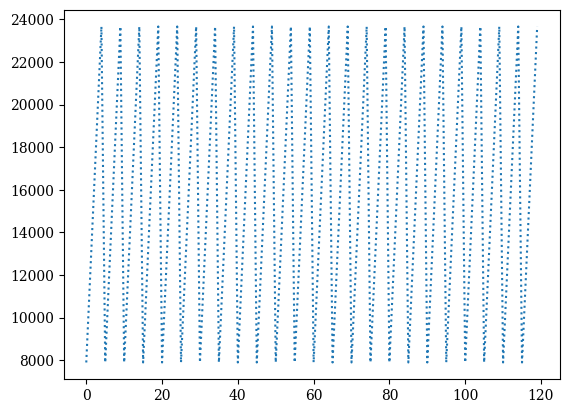

In [ ]:
plt.plot(data["Reynolds Number"], linestyle = 'dotted')
plt.show()

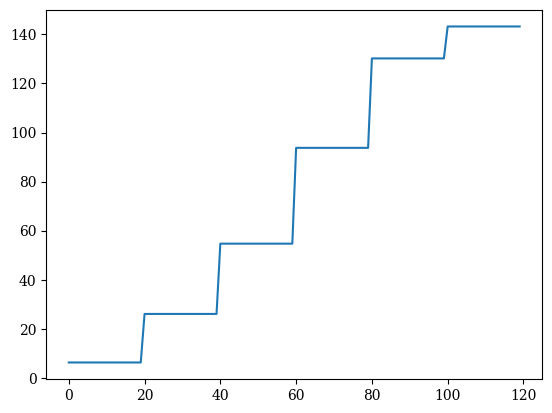

In [ ]:
plt.plot(data['Heat Flux'] )
plt.show()

The code sns.catplot(data=data, x="Reynolds Number", y="Nusselt Number", hue="Concentration") is using the catplot function from the Seaborn data visualization library to create a categorical plot that shows the relationship between the variables "Reynolds Number" and "Nusselt Number" in the data dataset, grouped by the categorical variable "Concentration".

The catplot function allows you to create several types of categorical plots, including strip plots, swarm plots, box plots, and violin plots, among others. In this case, the default plot type is a "strip plot", which displays the individual data points as dots, one for each observation.

The x parameter specifies the variable to be plotted on the x-axis, which is "Reynolds Number" in this case. The y parameter specifies the variable to be plotted on the y-axis, which is "Nusselt Number". The hue parameter specifies the categorical variable to be used to group the data points, which is "Concentration" in this case.

By grouping the data points by concentration level, it becomes possible to see whether there are any differences in the relationship between the "Reynolds Number" and "Nusselt Number" variables across different concentration levels.

The catplot function returns a FacetGrid object, which can be further customized using various parameters, such as kind to specify the type of categorical plot to create, col or row to create multiple plots separated by a categorical variable, and height and aspect to adjust the size and shape of the plot.

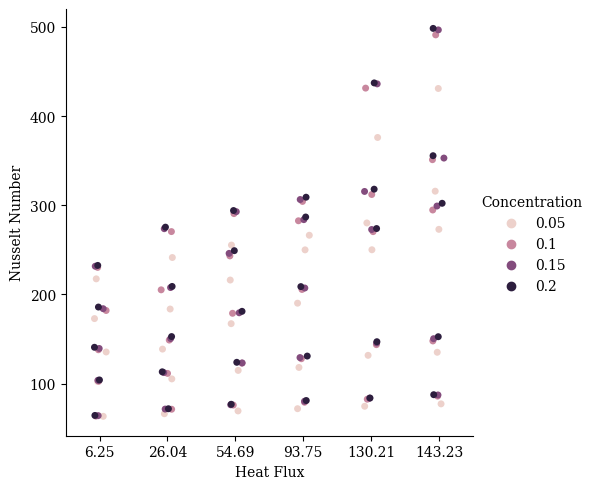

In [ ]:
sns.catplot(data=data, x="Heat Flux", y="Nusselt Number", hue="Concentration")
plt.savefig('catnuqAl2O3.tiff', dpi=400)

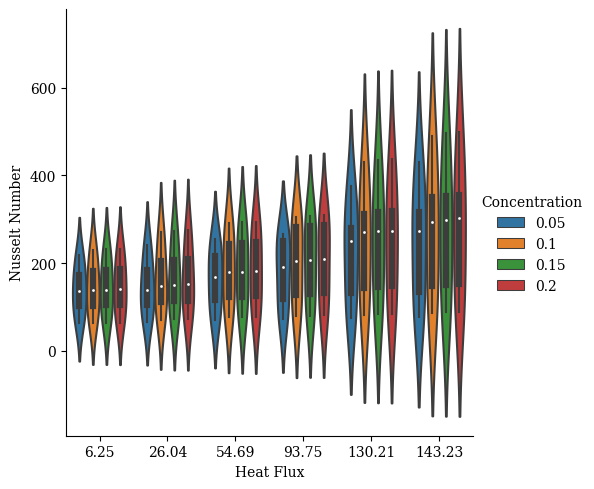

In [ ]:
sns.catplot(
    data=data, x="Heat Flux", y="Nusselt Number", hue="Concentration", kind="violin")
plt.savefig('violinAl2O3.tiff', dpi=400)

The catplot function allows you to create several types of categorical plots, including strip plots, swarm plots, box plots, and violin plots, among others. In this case, the kind parameter is set to "violin", which specifies that a violin plot should be created.

A violin plot is a type of plot that combines the features of a box plot and a kernel density plot. It displays the distribution of a variable using a combination of a box plot and a density plot, where the width of the violin represents the density of the data at different values, and the white dot in the middle represents the median value. The thicker parts of the violin indicate regions with more data points, while the thinner parts indicate regions with fewer data points.

The x parameter specifies the variable to be plotted on the x-axis, which is "Heat Flux" in this case. The y parameter specifies the variable to be plotted on the y-axis, which is "Nusselt Number". The hue parameter specifies the categorical variable to be used to group the data points, which is "Concentration" in this case.

By creating a violin plot, it becomes possible to see the distribution of the "Nusselt Number" variable for different values of "Heat Flux", and to compare the distribution across different concentration levels. The catplot function returns a FacetGrid object, which can be further customized using various parameters, such as col or row to create multiple plots separated by a categorical variable, and height and aspect to adjust the size and shape of the plot.




GradientBoostingRegressor - Grid Search Optimization Method Al2O3

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

X_train=SimpleImputer().fit_transform(X_train)
X_test=SimpleImputer().fit_transform(X_test)


model = GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996486 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
-0.247317 (0.715584) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-0.247273 (0.715575) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-0.247235 (0.715528) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
-0.238249 (0.709880) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
-0.238190 (0.709897) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
-0.238017 (0.709599) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
-0.227144 (0.702890) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-0.227022 (0.702859) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
-0.226598 (0.702261) with: {'learning_rate'

In [ ]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % grid_search.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, grid_search.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.989
The mean squared error (MSE) on test set: 97.8442


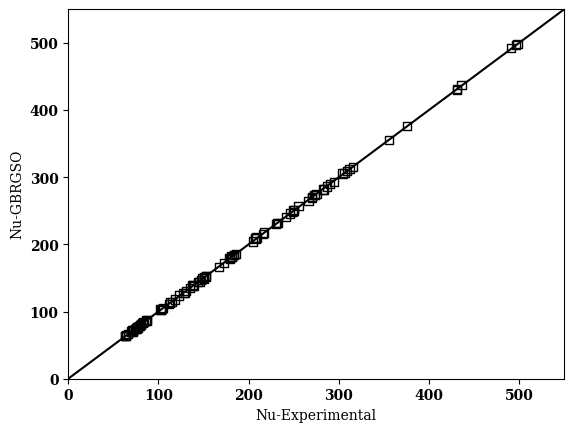

In [ ]:
y_train_pre= grid_search.predict(X_train)
plt.scatter(y_train, y_train_pre, marker='s', facecolor='none', edgecolor='black')
plt.xlabel('Nu-Experimental')
plt.ylabel('Nu-GBRGSO')
xlim = [0, 550]
ylim = [0, 550]
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xlim(xlim)
plt.ylim(ylim)
m, b = np.polyfit(y_train, y_train_pre, 1)
x = np.linspace(xlim[0], xlim[1], 100)
y = np.polyval([m, b], x)
plt.plot(x, y, color='black')
plt.savefig('Nu-Experimental Vs Nu-GBRGSO Training data water-Al2O3.tiff', dpi=400)

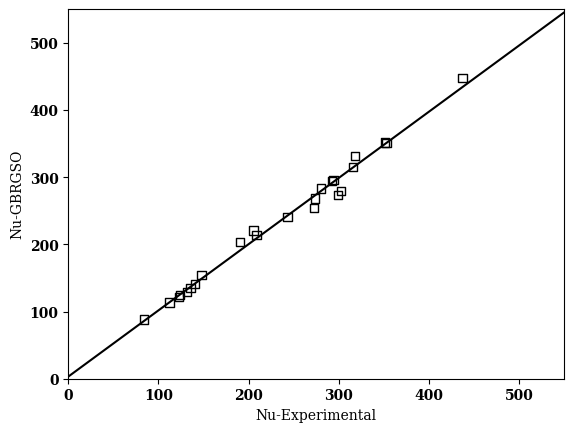

In [ ]:
test_predictions = grid_search.predict(X_test).flatten()
#plt.legend(title = "$R^2$=0.999",frameon = False,loc=4,)  
plt.scatter(y_test, test_predictions, marker='s', facecolor='none', edgecolor='black')
plt.xlabel('Nu-Experimental')
plt.ylabel('Nu-GBRGSO')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
xlim = [0, 550]
ylim = [0, 550]
plt.xlim(xlim)
plt.ylim(ylim)
m, b = np.polyfit(y_test, test_predictions, 1)
x = np.linspace(xlim[0], xlim[1], 100)
y = np.polyval([m, b], x)
plt.plot(x, y, color='black')
#plt.plot([100, 400],[100,400],'k')
#plt.scatter(X_train, y_train,'r')
plt.savefig('Nu-Experimental Vs Nu-GBRGSO Testing data water-Al2O3.tiff', dpi=400)

In [ ]:
y_pred = grid_search.predict(X_test).flatten()

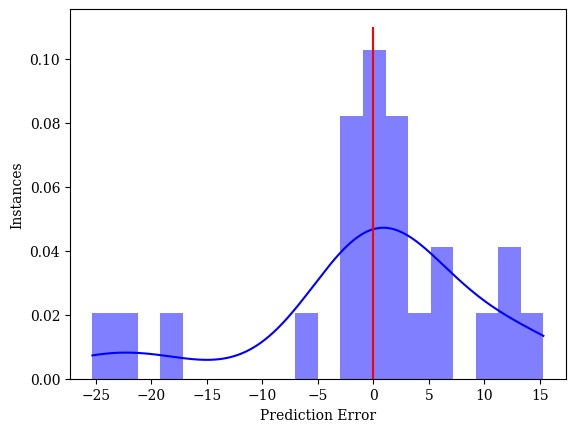

In [ ]:
error = y_pred - y_test
sns.histplot(error, bins = 20,color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.vlines(0, 0, 0.11, color='red')
#plt.legend(['Error Al$_2$O$_3$ '])
#plt.title("ErrorHistogram water -Al$_2$O$_3$ Nanofluid")
plt.xlabel("Prediction Error")
plt.ylabel("Instances")
plt.savefig('ErrorHistogram water-Al2O3.tiff', dpi=400)

In [ ]:
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))



Mean absolute error (MAE):      6.604453
Mean squared error (MSE):       97.844193
Root mean squared error (RMSE): 9.891622
R square (R^2):                 0.988580


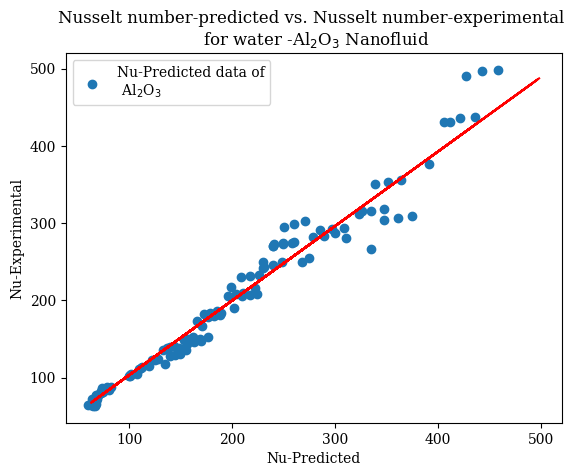

In [ ]:
#Comparison of different models with our deep learning model 
def Manish(q,C,Re):
  return  (14- (0.797 *q)- (165 *C) + (0.007056* Re) + (0.973 *q *C )+ (0.000097 * q * Re) + (0.01434 * C *Re))

datag=pd.read_csv('data2.csv')
q= datag.iloc[:,0:1]
C=datag.iloc[:,1:2]
Re=datag.iloc[:,2:3]
Nu=datag.iloc[:,3:4]
q=q.to_numpy()
C=C.to_numpy() # Converting to numpy array so that numpy features can be applied
Re=Re.to_numpy()
Nu=Nu.to_numpy()
yp=Manish(q,C,Re)
#plt.scatter( Nu,yp.flatten())
plt.scatter(yp,Nu)
m, b = np.polyfit(Nu.flatten(), yp.flatten(), 1)
x=Nu.flatten()
plt.plot(x, m*x + b, color='red')
#plt.plot([50, 400],[50,450],'r')
plt.legend(['Nu-Predicted data of\n Al$_2$O$_3$ '], loc='upper left')
plt.title("Nusselt number-predicted vs. Nusselt number-experimental \n for water -Al$_2$O$_3$ Nanofluid")
plt.xlabel('Nu-Predicted')
plt.ylabel('Nu-Experimental')
plt.savefig('Comparison_Al2O3 (%).tiff',dpi=400)
plt.show()

In [ ]:
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(Nu,yp))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(Nu,yp))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(Nu,yp)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(Nu,yp))



Mean absolute error (MAE):      13.262736
Mean squared error (MSE):       372.170106
Root mean squared error (RMSE): 19.291711
R square (R^2):                 0.967145


In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [ ]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:01<00:00, 23.70it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.99,0.99,6.87,0.06
XGBRegressor,0.99,0.99,7.31,0.23
ExtraTreesRegressor,0.98,0.98,12.00,0.09
ExtraTreeRegressor,0.98,0.98,12.69,0.01
RandomForestRegressor,0.97,0.98,14.18,0.18
DecisionTreeRegressor,0.97,0.97,15.56,0.01
LGBMRegressor,0.96,0.97,16.89,0.05
HistGradientBoostingRegressor,0.96,0.97,16.89,0.11
BaggingRegressor,0.95,0.96,19.50,0.02
